<h2><center> <strong>Literature</strong></center></h2>
<h2><center> <strong>Team Reef Safe</strong></center></h2>

The choice of a neural network is dependent on the available software and hardware resources, speed ,and the expected accuracy. Object detection networks are classified as multi-stage or single stage. 

Examples of single staged neural nets are the SSD, YOLO, etc. The multi staged approaches uses the region proposal networks in their architectures to extract feature maps from the backbone. Examples of multi stage networks are the RCNN and RFCN.

<h3><center> <strong>Architecture of a neural network</strong></center></h3>

Object detection nets consists of the input, backbone, neck and the head. The input takes in an image, and it outputs to a feature extractor consisting of dense convolution and max pooling layers. Residual Network(ResNet), ResNext,DenseNet, VGG16 etc. are the commonly used backbones. They are trained on standardized datasets such as [COCO](https://cocodataset.org/#home) or [ImageNet](https://image-net.org).
<br/>
The role of the neck is to extract feature maps e.g the Feature Pyramid Network. The head of a single stage network is dense prediction layer and sparse prediction for a two stage detector(i.e RCNN & RFCN)
<br />
![](https://github.com/denniesbor/KAGGLE-PROTECT-THE-GREAT-BARRIER-REEF/blob/e0c3e4253d8fd6a867252cab1feb3bab3d80f377/object_detection_arch.png?raw=true)
<br />
[**Figure 1.** Schematic representation of a single and multi stage neural network. Source: [Ultralytics](https://arxiv.org/pdf/1611.10012.pdf) ]

<h3><center> <strong>The choice of a neural network.</strong></center></h3>

Computational resources determine the amount of time spent on training and inference. GPU and TPU runtime accelerate the training as well as the inference time. The computational resource demand differ from one model to another.

Speed is key in a real-time object detection system or video search engines.  A balance of speed and resource requirements  is considered to achieve optimal performance.

The implementation of the minimum viable product for the module one was based on the performance of the Faster R-CNN ResNet Inception, Yolov4 and Yolov5 on pre-processed TensorFlow-Protect the great barrier datasets.

<h3><center> <strong>Yolo(Single stage)</strong></center></h3>

Yolo is a single stage state of the art object detection algorithm. There are 4 documented versions of YOLO and the fifth version designed by Ultralytics team. [YOLO](https://github.com/ultralytics/yolov5) is described as a YOLOv4 implementation in Pytorch.
Compared with other algorithms, YOLO5 perfoms exceptionally well with a less GPU time.

According to [Huang,et al](https://arxiv.org/pdf/1611.10012.pdf) YOLO v4 attains a mean average precision of 43.5 running on a Tesla V100 GPUs while training on Common Objects in Context datasets. The neck of YOLO4 uses SPP and PAN.
<br />
![yolo](https://github.com/denniesbor/KAGGLE-PROTECT-THE-GREAT-BARRIER-REEF/blob/assets/Yolov5_performance.png?raw=true)
<br/>
[**Figure 2.** Average precision vs GPU speed of *YOLO5* weights against *EfficientDet* on . on [COCO](https://cocodataset.org/#home) datasets. Source: [Ultralytics](https://github.com/ultralytics/yolov5) ]

### What are Bag of Freebies and Bag of Specials?

They define the inference - training trade-off of a model. The bag of freebies are the methods applied to the model and which does not interfere with inference. Some of these methods include the data augmentation, regularization techniques e.g., dropout, drop-connect and drop-block.

The bag of freebies are the methods which improve the accuracy of the model by at the expense of inference costs. These methods introduce attention mechanisms. SPP is an example of this feature and is applied in YOLOv4.

<h3><center> <strong>Faster R-CNN(Multi stage)</strong></center></h3>

R-CNN models is a multi layered conv neural network and consists of the feature extractor, a region proposal algorithm to generate bounding boxes, a regression and classification layer. R-CNNs tradeoff their speed for accuracy. 

In Faster R-CNN, Region Proposal Network generation is not CPU restricted compared to the previous flavours of region convolution neural network.
<br />
![](https://github.com/denniesbor/KAGGLE-PROTECT-THE-GREAT-BARRIER-REEF/blob/assets/feature_extractor_acc.png?raw=True)
<br />
[**Figure 3.** Mean average precision against backbone accuracy of Faster R-CNN, R-FCN and SSD]
<h2><center> <strong>MVP - Performance comparison of YOLOv4, YOLOv5 and R-CNN</strong></center></h2>
The TensorFlow- Save the Great Barrier mvp is implemented using Faster R-CNN, YOLO4 and YOLO5 default tuning parameters. Performance analysis of the three models is done using their mean average precision. Faster RCNN runs on Resnet Inception backbone, whereas YOLO4 is built on darknet.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
import cv2
from ast import literal_eval
from sklearn.model_selection import train_test_split
# !pip3 install jedi==0.17.2

In [ ]:
# show image
def show_image(filename,startpoint,endpoint):

  img = cv2.imread(filename)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  thickness = 2
  color = (255,0,0)
  # Using cv2.rectangle() method to draw a rectangle

  img = cv2.rectangle(img, startpoint, endpoint, color, thickness)


  fig = plt.figure(figsize = (10,8))
  plt.imshow(img, cmap=None)

  return

In [ ]:
RAWFILES = '/content/drive/MyDrive/tensorflow-great-barrier-reef'
TRAIN_IMGS = '/content/drive/MyDrive/tensorflow-great-barrier-reef/train_images'
TRAIN_CSV = '/content/drive/MyDrive/tensorflow-great-barrier-reef/train.csv'
TEST_CSV = '/content/drive/MyDrive/tensorflow-great-barrier-reef/train.csv'

In [ ]:
# read the train and test csv
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

In [3]:
# CREATE WORKING DIRECTORY AFTER CLEANING

# define directories
# A python script to make necessary directories:

# makes the working directory given the root dir and the subdir name

def make_dirs(workdirname):
    file_path = '/content/drive/MyDrive'
    WORKDIRNAME = workdirname
    WORKDIR = os.path.join(file_path,WORKDIRNAME)
    TRAINIGDIR = os.path.join(WORKDIR,'TRAINIGDIR')
    models = os.path.join(WORKDIR,'models')
    DATA = os.path.join(WORKDIR,'DATA')
    TRAIN = os.path.join(DATA,'TRAIN')
    TEST = os.path.join(DATA,'TEST')
    VALID = os.path.join(DATA,'VALID')
    PRETRAINEDMODEL = os.path.join(DATA,'PRETRAINEDMODEL')
    INFERENCE = os.path.join(WORKDIR,'INFERENCE')
    frozen_model = os.path.join(INFERENCE,'frozen_model')

    if os.path.exists(file_path):
        if not os.path.exists(os.path.join(file_path,WORKDIRNAME)):
            os.mkdir(WORKDIR)
        if not os.path.exists(TRAINIGDIR):
            os.mkdir(TRAINIGDIR)
        if not os.path.exists(models):
            os.mkdir(models)
        if not os.path.exists(DATA):
            os.mkdir(DATA)
        if not os.path.exists(INFERENCE):
            os.mkdir(INFERENCE)
        if not os.path.exists(frozen_model):
            os.mkdir(frozen_model)
        if os.path.exists(DATA):
            if not os.path.exists(TRAIN):
                os.mkdir(TRAIN)  
            if not os.path.exists(TEST):
                os.mkdir(TEST)
            if not os.path.exists(TEST):
                os.mkdir(TEST)
            if not os.path.exists(VALID):
                os.mkdir(VALID)
            if not os.path.exists(PRETRAINEDMODEL):
                os.mkdir(PRETRAINEDMODEL)
    else:
        print("The file doesn't exist")
    return (WORKDIRNAME,WORKDIR,TRAINIGDIR,models,DATA,TRAIN,TEST,VALID,PRETRAINEDMODEL,INFERENCE,frozen_model)

WORKDIRNAME,WORKDIR,TRAINIGDIR,models,DATA,TRAIN,TEST,VALID,PRETRAINEDMODEL,INFERENCE,frozen_model = make_dirs(workdirname='F-RCNN')

In [ ]:
train_df.video_id.value_counts()

2    8561
1    8232
0    6708
Name: video_id, dtype: int64

In [ ]:
train_df.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]


In [ ]:
# extracts the bounding boxes of the starfish

def add_image_path(row,Train =True):
    
    #returns the image location
    video_id = row['video_id']
    image_id = row['image_id']

    filename = f"{TRAIN_IMGS}/video_{int(video_id)}/{image_id.split('-')[1]}.jpg"
    if(Train):
        annots = row['annotations']
        xmin = annots['x']
        xmax = annots['x'] + annots['width']
        ymin = annots['y']
        ymax = annots['y'] + annots['height']
        height = annots['height']
        width = annots['width']

        return [filename,xmin,xmax,ymin,ymax,height,width]
    else:
        return filename

In [ ]:
# train with annotations
train_data = train_df[train_df['annotations'] != '[]']
train_data.reset_index(inplace=True,drop=True)
# make a copy of the test_dummy
test_data = test_df.copy()


# extract 20 images for inferences
test_images_csv = train_data.iloc[-20:]

# drop the last 20 rows from train data
drop_data = train_data.copy()

train_data = drop_data.drop(list(test_images_csv.index))

In [ ]:
 # convert the string rep of lists to lists by applying the literal eval on the annotations
train_data['annotations'] = train_data['annotations'].apply(lambda x: literal_eval(x))
explode_data = train_data.copy()
train_data=explode_data.explode('annotations')
train_data.reset_index(inplace =True, drop=True)

In [ ]:
# generate the filename xmin ymin xmax ymax height and width from the df.
columns = ['filename','xmin','xmax','ymin','ymax','height','width']

annotations = list(train_data.apply(lambda row: add_image_path(row,Train =True),axis=1))
annotations = pd.DataFrame(annotations, columns =columns)

# join the dataframe

train_data = pd.concat([train_data,annotations],axis=1)

# test_data

test_data['filename'] = test_data.apply(lambda row: add_image_path(row,Train =False),axis =1)

# obtain the filename of the test_images

test_images_csv['filename'] = test_images_csv.apply(lambda row: add_image_path(row,Train =False),axis =1)

In [ ]:
train_data.head(5)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,filename,xmin,xmax,ymin,ymax,height,width
0,0,40258,16,16,0-16,"{'x': 559, 'y': 213, 'width': 50, 'height': 32}",/content/drive/MyDrive/tensorflow-great-barrie...,559,609,213,245,32,50
1,0,40258,17,17,0-17,"{'x': 558, 'y': 213, 'width': 50, 'height': 32}",/content/drive/MyDrive/tensorflow-great-barrie...,558,608,213,245,32,50
2,0,40258,18,18,0-18,"{'x': 557, 'y': 213, 'width': 50, 'height': 32}",/content/drive/MyDrive/tensorflow-great-barrie...,557,607,213,245,32,50
3,0,40258,19,19,0-19,"{'x': 556, 'y': 214, 'width': 50, 'height': 32}",/content/drive/MyDrive/tensorflow-great-barrie...,556,606,214,246,32,50
4,0,40258,20,20,0-20,"{'x': 555, 'y': 214, 'width': 50, 'height': 32}",/content/drive/MyDrive/tensorflow-great-barrie...,555,605,214,246,32,50


In [ ]:
test_images_csv.head(5)

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,filename
4899,2,29859,8865,1093,2-8865,"[{'x': 448, 'y': 597, 'width': 60, 'height': 39}]",/content/drive/MyDrive/tensorflow-great-barrie...
4900,2,29859,8866,1094,2-8866,"[{'x': 444, 'y': 618, 'width': 62, 'height': 39}]",/content/drive/MyDrive/tensorflow-great-barrie...
4901,2,29859,8867,1095,2-8867,"[{'x': 440, 'y': 638, 'width': 64, 'height': 39}]",/content/drive/MyDrive/tensorflow-great-barrie...
4902,2,29859,8868,1096,2-8868,"[{'x': 438, 'y': 659, 'width': 64, 'height': 39}]",/content/drive/MyDrive/tensorflow-great-barrie...
4903,2,29859,8869,1097,2-8869,"[{'x': 437, 'y': 679, 'width': 64, 'height': 39}]",/content/drive/MyDrive/tensorflow-great-barrie...


In [ ]:
# move the test images in the barrier to the inference section

for image in list(test_images_csv['filename']):
    shutil.copy(image, TEST)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11878 entries, 0 to 11877
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        11878 non-null  int64 
 1   sequence        11878 non-null  int64 
 2   video_frame     11878 non-null  int64 
 3   sequence_frame  11878 non-null  int64 
 4   image_id        11878 non-null  object
 5   annotations     11878 non-null  object
 6   filename        11878 non-null  object
 7   xmin            11878 non-null  int64 
 8   xmax            11878 non-null  int64 
 9   ymin            11878 non-null  int64 
 10  ymax            11878 non-null  int64 
 11  height          11878 non-null  int64 
 12  width           11878 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.2+ MB


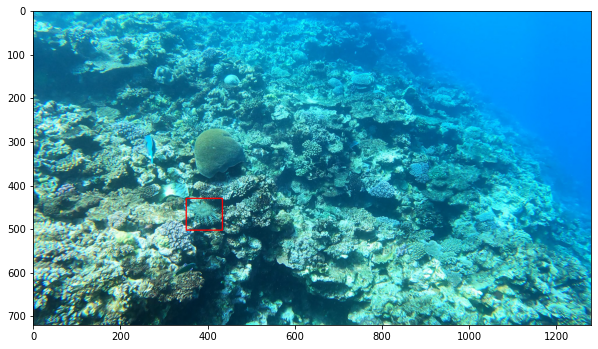

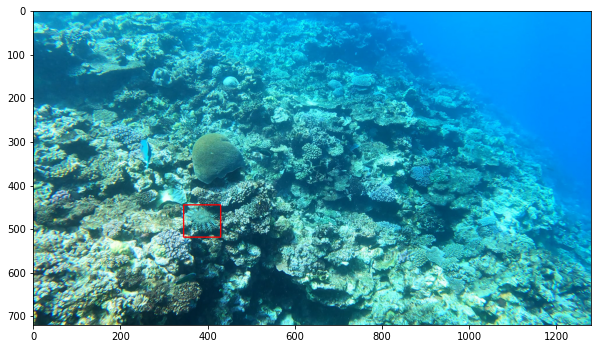

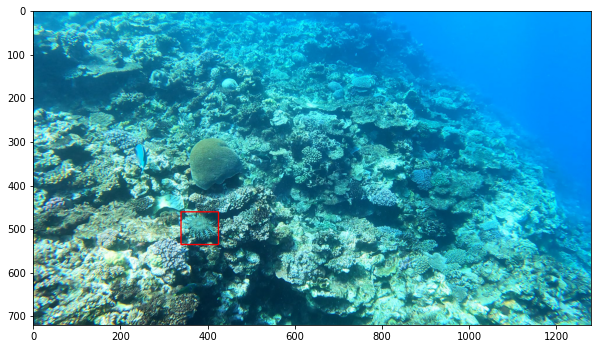

In [ ]:
for i in range(3):
    # row in the df
    row = train_data.iloc[100+i]
    filename = row['filename']
    startpoint = (int(row['xmin']),int(row['ymin']))
    endpoint = (int(row['xmax']),int(row['ymax']))
    show_image(filename,startpoint,endpoint)

In [ ]:
# Installing the necessary directories

In [4]:
# installing the object detection api
# cd working directory
os.chdir(WORKDIR)

!git clone https://github.com/tensorflow/models.git

# move the models to our preferred dir

In [5]:
# change wordir. you can cd or use inbuilt os change directory

os.chdir(os.path.join(os.getcwd(),'models','research'))

In [6]:
# use protobuf to make py scrips
!protoc object_detection/protos/*.proto --python_out=.

In [7]:
cp object_detection/packages/tf2/setup.py .

In [8]:
!python -m pip install .

Processing /content/drive/MyDrive/F-RCNN/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.1 MB 8.8 MB/s 
     |████████████████████████████████| 352 kB 66.8 MB/s 
     |████████████████████████████████| 2.2 MB 49.4 MB/s 
     |████████████████████████████████| 23.4 MB 1.5 MB/s 
     |████████████████████████████████| 47.7 MB 66 kB/s 
     |████████████████████████████████| 90 kB 8.1 MB/s 
     |████████████████████████████████| 1.1 MB 57.4 MB/s 
     |████████████████████████████████| 213 kB 83.0 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████

In [ ]:
# Download the pretrained model.
# cd into the DATA, PRETRAINED

os.chdir(PRETRAINEDMODEL)
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz

!tar -xvzf faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz
!rm -rf faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz

--2022-02-08 18:19:49--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.73.240, 2607:f8b0:4004:82a::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.73.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444343592 (424M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 423.76M  66.3MB/s    in 6.4s    

2022-02-08 18:19:56 (66.3 MB/s) - ‘faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz’ saved [444343592/444343592]

faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8/checkpoint/

In [ ]:
# convert train_dummy to train and validation
Train, Valid = train_test_split(train_data, test_size=0.33, random_state=42)
Train['class'] = 'starfish'
Valid['class'] = 'starfish'
# save the files
Train.to_csv(TRAIN+'/Train.csv',index=None)
Valid.to_csv(VALID+'/Valid.csv',index=None)
test_images_csv.to_csv(TEST+'/Test.csv',index=None)

In [38]:
os.chdir(os.path.join(models,'research'))
# convert the csv files into tf records
#The file is cloned from github

# import sys

# sys.path.append(models+'/research')

# import generate_tfrecord


!python3 generate_tfrecord.py --path_to_images /content/drive/MyDrive/tensorflow-great-barrier-reef/train_images \
    --path_to_annot '/content/drive/MyDrive/F-RCNN/DATA/TRAIN/Train.csv' \
        --path_to_label_map '/content/drive/MyDrive/F-RCNN/DATA/label-map.pbtxt' \
            --path_to_save_tfrecords '/content/drive/MyDrive/F-RCNN/DATA/TRAIN/Train.record'

images path :  /content/drive/MyDrive/tensorflow-great-barrier-reef/train_images
csv path :  /content/drive/MyDrive/F-RCNN/DATA/TRAIN/Train.csv
path to output tfrecords :  /content/drive/MyDrive/F-RCNN/DATA/TRAIN/Train.record
Generating tfrecord .... 
Successfully created the TFRecords: /content/drive/MyDrive/F-RCNN/DATA/TRAIN/Train.record


In [39]:
# generate eval tensor flow records

!python3 generate_tfrecord.py --path_to_images /content/drive/MyDrive/tensorflow-great-barrier-reef/train_images \
    --path_to_annot '/content/drive/MyDrive/F-RCNN/DATA/VALID/Valid.csv' \
        --path_to_label_map '/content/drive/MyDrive/F-RCNN/DATA/label-map.pbtxt' \
            --path_to_save_tfrecords '/content/drive/MyDrive/F-RCNN/DATA/VALID/Valid.record'

images path :  /content/drive/MyDrive/tensorflow-great-barrier-reef/train_images
csv path :  /content/drive/MyDrive/F-RCNN/DATA/VALID/Valid.csv
path to output tfrecords :  /content/drive/MyDrive/F-RCNN/DATA/VALID/Valid.record
Generating tfrecord .... 
Successfully created the TFRecords: /content/drive/MyDrive/F-RCNN/DATA/VALID/Valid.record


In [9]:
os.chdir(os.path.join(models,'research'))

In [10]:
# solving errors associated with cv2
!pip uninstall --yes opencv-python
!pip install opencv-python==4.1.2.30

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 28.3 MB 30.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [12]:
!pip uninstall --yes tensorflow
!pip install tensorflow==2.7.0

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 489.6 MB 19 kB/s 
     |████████████████████████████████| 1.3 MB 54.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires tensorflow~=2.8.0, but you have tensorflow 2.7.0 which is incompatible.
tensorflow-text 2.8.1 requires tensorflow<2.9,>=2.8.0, but you have tensorflow 2.7.0 which is incompatible.


In [ ]:
# run train scripts
!chmod +x training_scripts.sh
!bash training_scripts.sh

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
2022-02-08 20:25:27.620606: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0208 20:25:27.622414 140545693812608 cross_device_ops.py:1386] There are non-GPU devices in `tf.distribute.Strategy`, not

In [ ]:
!chmod +x eval_scripts.sh
!bash eval_scripts.sh

In [ ]:
# export the trained model as protobuff file for inference

!chmod u+x object_detection/export_model.sh
!bash object_detection/export_model.sh